In [27]:
import pandas as pd
df = pd.read_csv("HR_comma_sep.csv")
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [15]:
left = df[df.left==1]
left.shape

(3571, 10)

In [16]:
retained = df[df.left==0]
retained.shape

(11428, 10)

In [28]:
grouped = df.groupby('left').mean()
grouped

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [ ]:
Inferences:
    1. Satisfaction level among the group who left the org is low compared to the group retained
    2.People who left the org spend more monthly average hours than the folk retained
    3. people left the org spent little more average years than the folks retained
    4. People reatined are offered with more promotions

In [ ]:
# employee salary and retention

In [38]:
pd.crosstab(df.salary,df.left[df['left']==1]).sort_values([1], ascending= False)

left,1
salary,
low,2172
medium,1317
high,82


<AxesSubplot:xlabel='salary'>

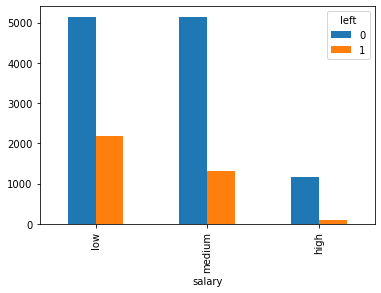

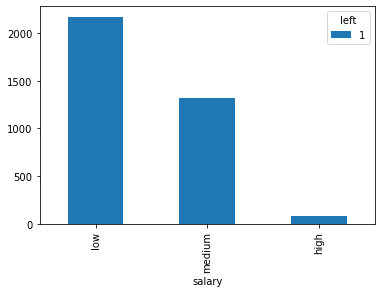

In [40]:
pd.crosstab(df.salary,df.left).sort_values([1], ascending=False).plot(kind='bar')
pd.crosstab(df.salary,df.left[df['left']==1]).sort_values([1], ascending=False).plot(kind='bar')

In [ ]:
# Correlation between Department and retention

<AxesSubplot:xlabel='Department'>

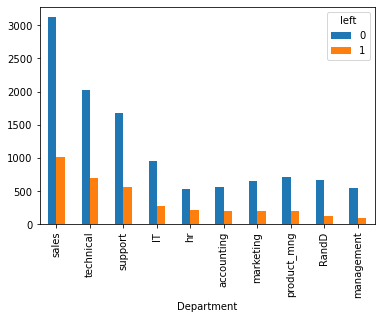

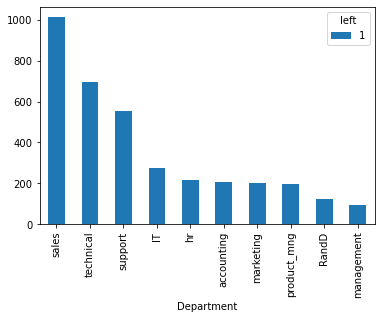

In [41]:
pd.crosstab(df.Department,df.left).sort_values([1], ascending=False).plot(kind='bar')
pd.crosstab(df.Department,df.left[df['left']==1]).sort_values([1], ascending=False).plot(kind='bar')

In [ ]:
Variables to be considered for Logistic regression
1. satisfaction_level
2. average_montly_hours
3. promotion_last_5years
4. Salary

In [ ]:
# logistic Regression

In [69]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [71]:
dummies = pd.get_dummies(subdf.salary, prefix='salary_')
dummies.head()

,salary__high,salary__low,salary__medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [72]:
finaldf = pd.concat([subdf,dummies], axis=1)
finaldf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary__high,salary__low,salary__medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [73]:
finaldf.drop('salary',axis='columns', inplace=True)
finaldf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary__high,salary__low,salary__medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [74]:
X = finaldf
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary__high,salary__low,salary__medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [76]:
y = df.left
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [131]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size=0.8, random_state=10)
X_train

,satisfaction_level,average_montly_hours,promotion_last_5years,salary__high,salary__low,salary__medium
13388,0.85,260,0,0,0,1
6481,0.77,187,0,0,0,1
1494,0.17,188,0,0,1,0
2518,0.63,175,0,0,0,1
9958,0.91,179,0,0,1,0
...,...,...,...,...,...,...
11633,0.77,269,0,1,0,0
1344,0.39,150,0,0,1,0
12815,0.80,236,0,0,1,0
7293,0.97,152,0,0,0,1


In [133]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [135]:
model.predict(X_test)

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [138]:
model.score(X_test,y_test)  # accuracy score

0.7706666666666667

In [137]:
model.predict_proba(X_test)

array([[0.79706492, 0.20293508],
       [0.61097814, 0.38902186],
       [0.7425204 , 0.2574796 ],
       ...,
       [0.42278905, 0.57721095],
       [0.92934163, 0.07065837],
       [0.70733056, 0.29266944]])